Objective
Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/Users/guillaume/Desktop/GoMycode/Intelligence Artificielle/FichiersCsv/kc_house_data (1).csv')

In [3]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

<Axes: xlabel='price'>

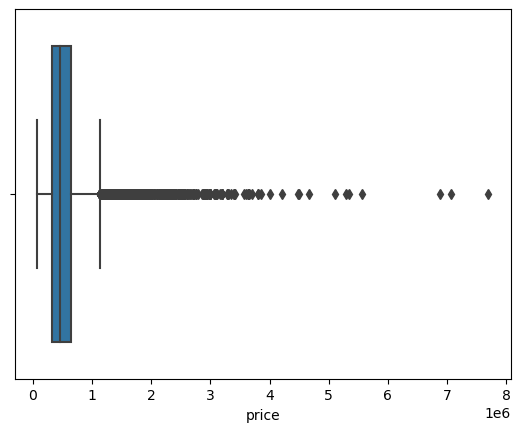

In [4]:
#On va faire le boxplot du prix pour voir sa distribution
import seaborn as sns
sns.boxplot(df['price'], x=df['price'])
#rq : laxe des absicess est en mio deuros

In [5]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
#on peut aussi visualiser les données du prix sous forme dhistogramme
fig = px.histogram(df, x='price')
fig

In [7]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
#on supprime les colonnes inutiles : id, date

In [9]:
df.drop(labels = ['id','date'],axis = 1, inplace = True)

In [10]:
#on regarde si le dataset a des valeurs nulles
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#on va faire un scatter plot de chaque variable par rapport au prix pour voir s'il y a un lien intéressant
import plotly.graph_objs as go
import plotly.offline as pyo

In [12]:
#Create a trace using the go.Scatter() function
#x and y arguments are the data to be plotted on the X and Y axis, respectively
#The mode argument specifies the type of plot, in this case, markers.
#Pour la mode, on peut choisir 'lines' ou 'markers'
trace = go.Scatter(x = df['bedrooms'] , y = df['price'], mode = 'markers')
#Create a data list. The trace object created in the previous step is added to a list called data
data = [trace]
#Create a layout object using the go.Layout() function.
layout = go.Layout(title='Price vs. Number of bedrooms',
                   xaxis=dict(title='bedrooms'),
                   yaxis=dict(title='price'))
fig = go.Figure(data = data, layout = layout)
pyo.plot(fig)

'temp-plot.html'

In [13]:
#on va le grapher de façon plus simple pour l'avoir sur le notebook
ColumnNames = df.columns.to_list()

/var/folders/m6/t912xmd176sgkbvdy2hcngqh0000gn/T/ipykernel_1027/1490527399.py:42: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.

/var/folders/m6/t912xmd176sgkbvdy2hcngqh0000gn/T/ipykernel_1027/1490527399.py:43: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



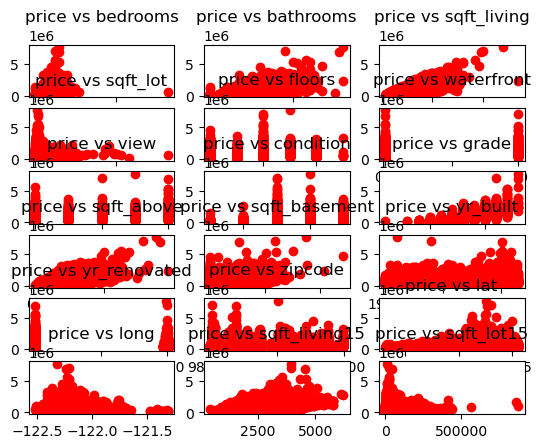

In [14]:
fig, axs = plt.subplots(6, 3)
axs[0, 0].plot(df['bedrooms'], df['price'], 'ro')
axs[0, 1].plot(df['bathrooms'], df['price'], 'ro')
axs[0, 2].plot(df['sqft_living'], df['price'], 'ro')
axs[1, 0].plot(df['sqft_lot'], df['price'], 'ro')
axs[1, 1].plot(df['floors'], df['price'], 'ro')
axs[1, 2].plot(df['waterfront'], df['price'], 'ro')
axs[2, 0].plot(df['view'], df['price'], 'ro')
axs[2, 1].plot(df['condition'], df['price'], 'ro')
axs[2, 2].plot(df['grade'], df['price'], 'ro')
axs[3, 0].plot(df['sqft_above'], df['price'], 'ro')
axs[3, 1].plot(df['sqft_basement'], df['price'], 'ro')
axs[3, 2].plot(df['yr_built'], df['price'], 'ro')
axs[4, 0].plot(df['yr_renovated'], df['price'], 'ro')
axs[4, 1].plot(df['zipcode'], df['price'], 'ro')
axs[4, 2].plot(df['lat'], df['price'], 'ro')
axs[5, 0].plot(df['long'], df['price'], 'ro')
axs[5, 1].plot(df['sqft_living15'], df['price'], 'ro')
axs[5, 2].plot(df['sqft_lot15'], df['price'], 'ro')


axs[0, 0].set_title("price vs bedrooms")
axs[0, 1].set_title("price vs bathrooms")
axs[0, 2].set_title("price vs sqft_living")
axs[1, 0].set_title("price vs sqft_lot")
axs[1, 1].set_title("price vs floors")
axs[1, 2].set_title("price vs waterfront")
axs[2, 0].set_title("price vs view")
axs[2, 1].set_title("price vs condition")
axs[2, 2].set_title("price vs grade")
axs[3, 0].set_title("price vs sqft_above")
axs[3, 1].set_title("price vs sqft_basement")
axs[3, 2].set_title("price vs yr_built")
axs[4, 0].set_title("price vs yr_renovated")
axs[4, 1].set_title("price vs zipcode")
axs[4, 2].set_title("price vs lat")
axs[5, 0].set_title("price vs long")
axs[5, 1].set_title("price vs sqft_living15")
axs[5, 2].set_title("price vs sqft_lot15")


fig.tight_layout()
fig.show()

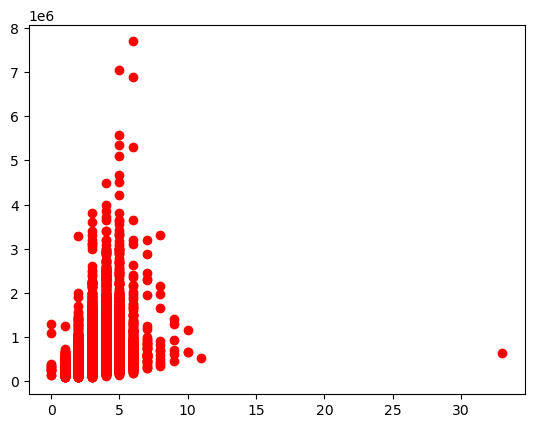

In [15]:
plt.plot(df['bedrooms'], df['price'], 'ro')

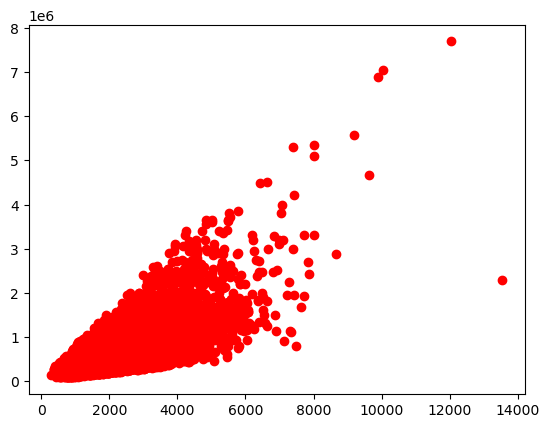

In [16]:
plt.plot(df['sqft_living'], df['price'], 'ro')

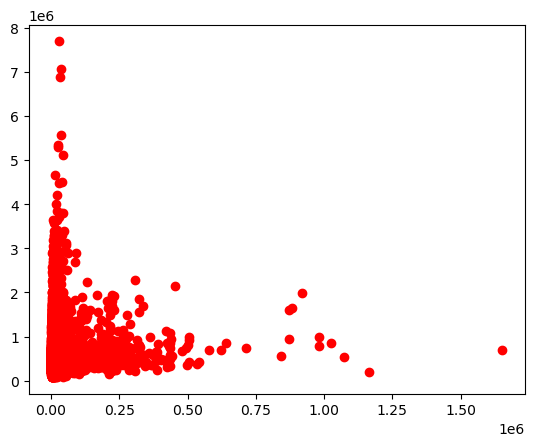

In [17]:
plt.plot(df['sqft_lot'], df['price'], 'ro')

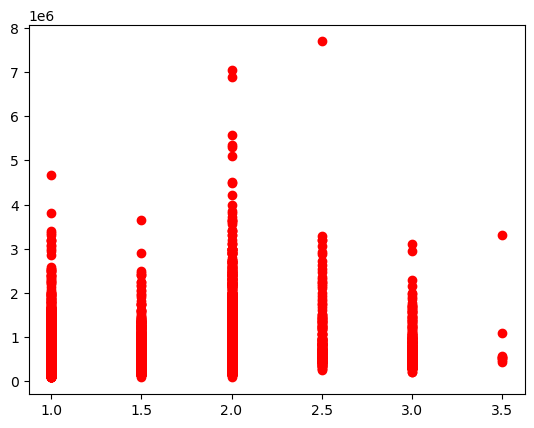

In [18]:
plt.plot(df['floors'], df['price'], 'ro')

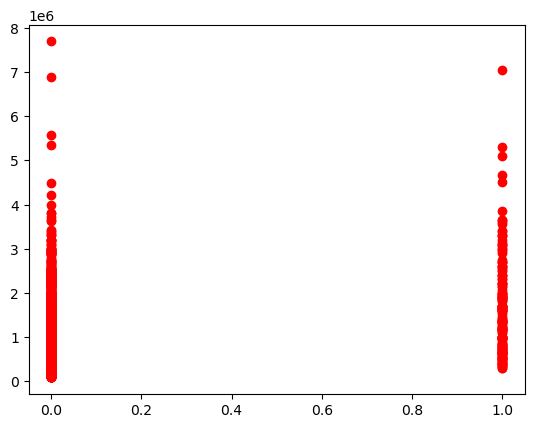

In [19]:
plt.plot(df['waterfront'], df['price'], 'ro')

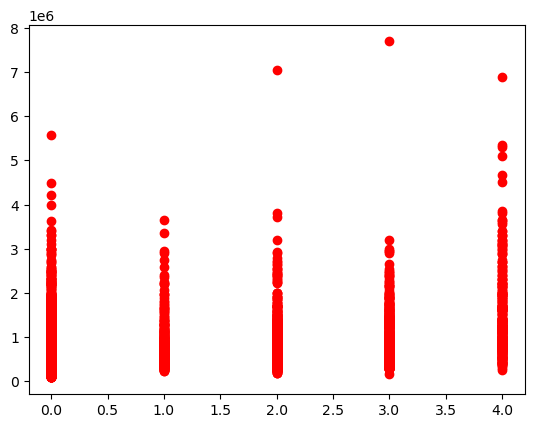

In [20]:
plt.plot(df['view'], df['price'], 'ro')

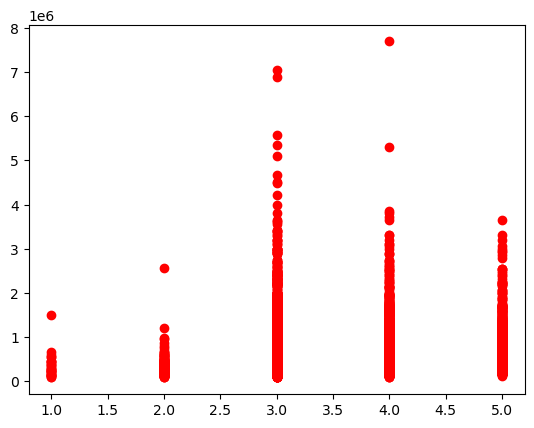

In [21]:
plt.plot(df['condition'], df['price'], 'ro')

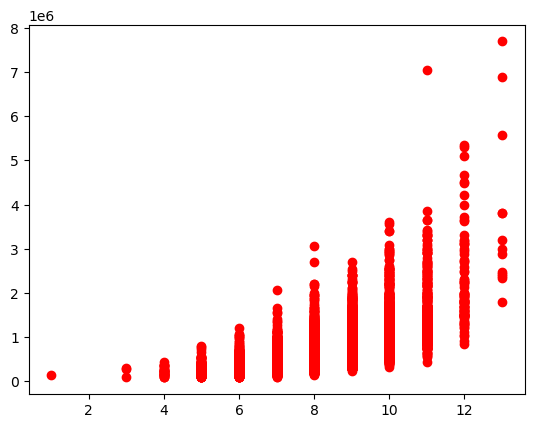

In [22]:
plt.plot(df['grade'], df['price'], 'ro')

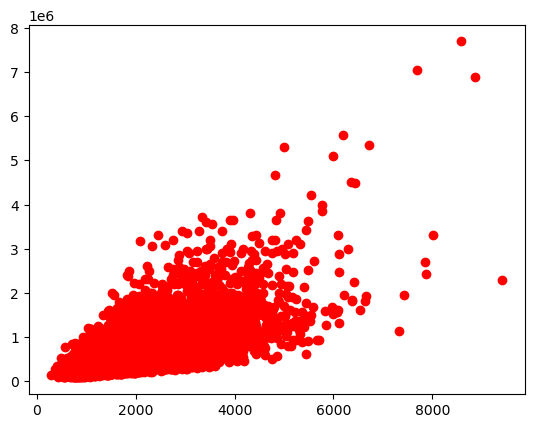

In [23]:
plt.plot(df['sqft_above'], df['price'], 'ro')

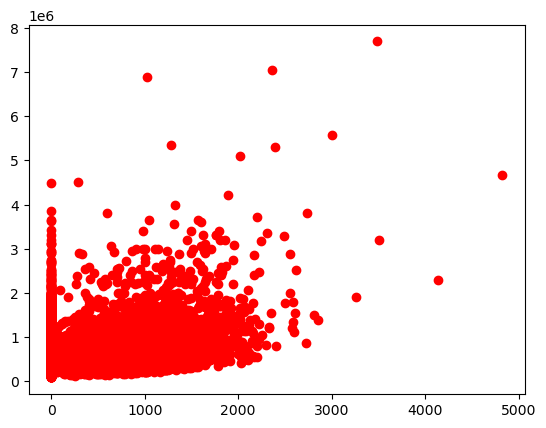

In [24]:
plt.plot(df['sqft_basement'], df['price'], 'ro')

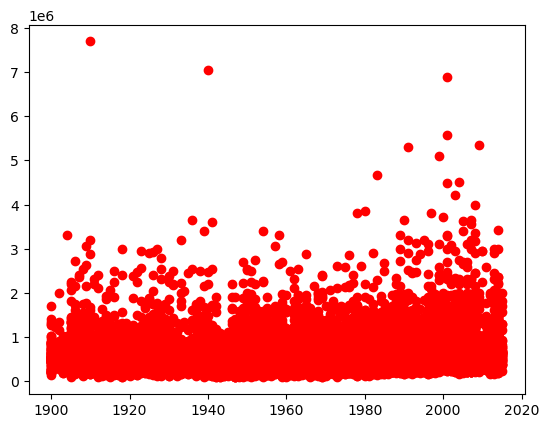

In [25]:
plt.plot(df['yr_built'], df['price'], 'ro')

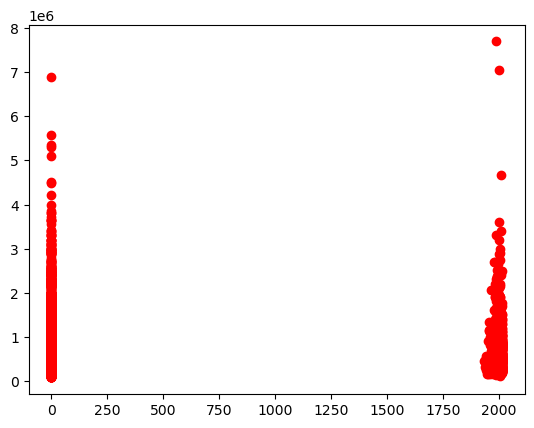

In [26]:
plt.plot(df['yr_renovated'], df['price'], 'ro')

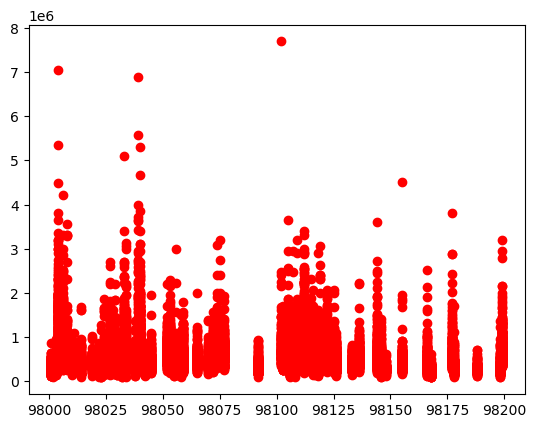

In [27]:
plt.plot(df['zipcode'], df['price'], 'ro')

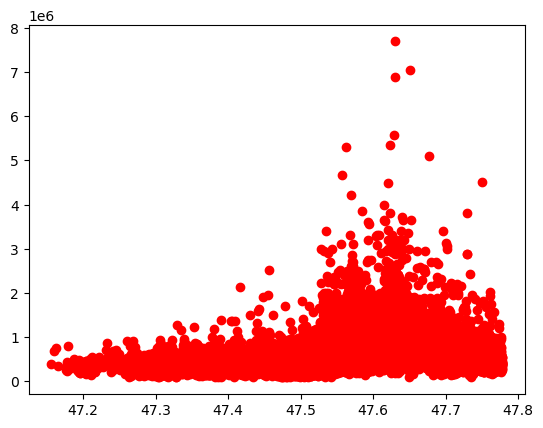

In [28]:
plt.plot(df['lat'], df['price'], 'ro')

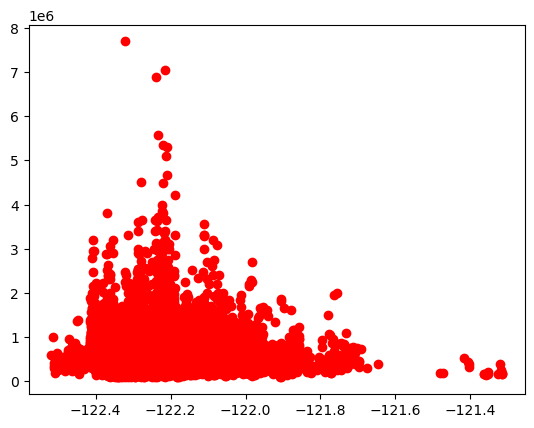

In [29]:
plt.plot(df['long'], df['price'], 'ro')

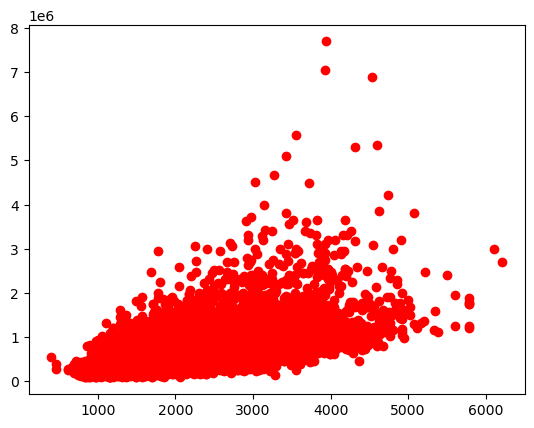

In [30]:
plt.plot(df['sqft_living15'], df['price'], 'ro')

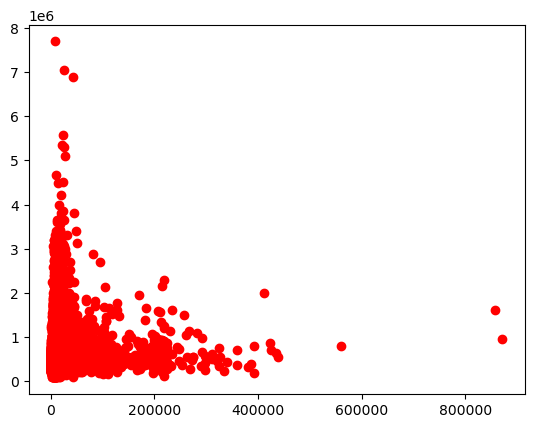

In [31]:
plt.plot(df['sqft_lot15'], df['price'], 'ro')

On a utilisé les scater plot pour voir les liens entre les datas.
De leur analyse il apparait qu’il semblerait y avoir une relation entre le prix et:
‘sqft_living'
‘condition'
‘grade'
‘sqft_above'

In [44]:
#On regarde le nombre de valeurs unique pour la lattitude
a = df['lat'].unique()
len(a)

5034

Le résultat est de 5034, c'est trop pour pouvoir l'exploiter

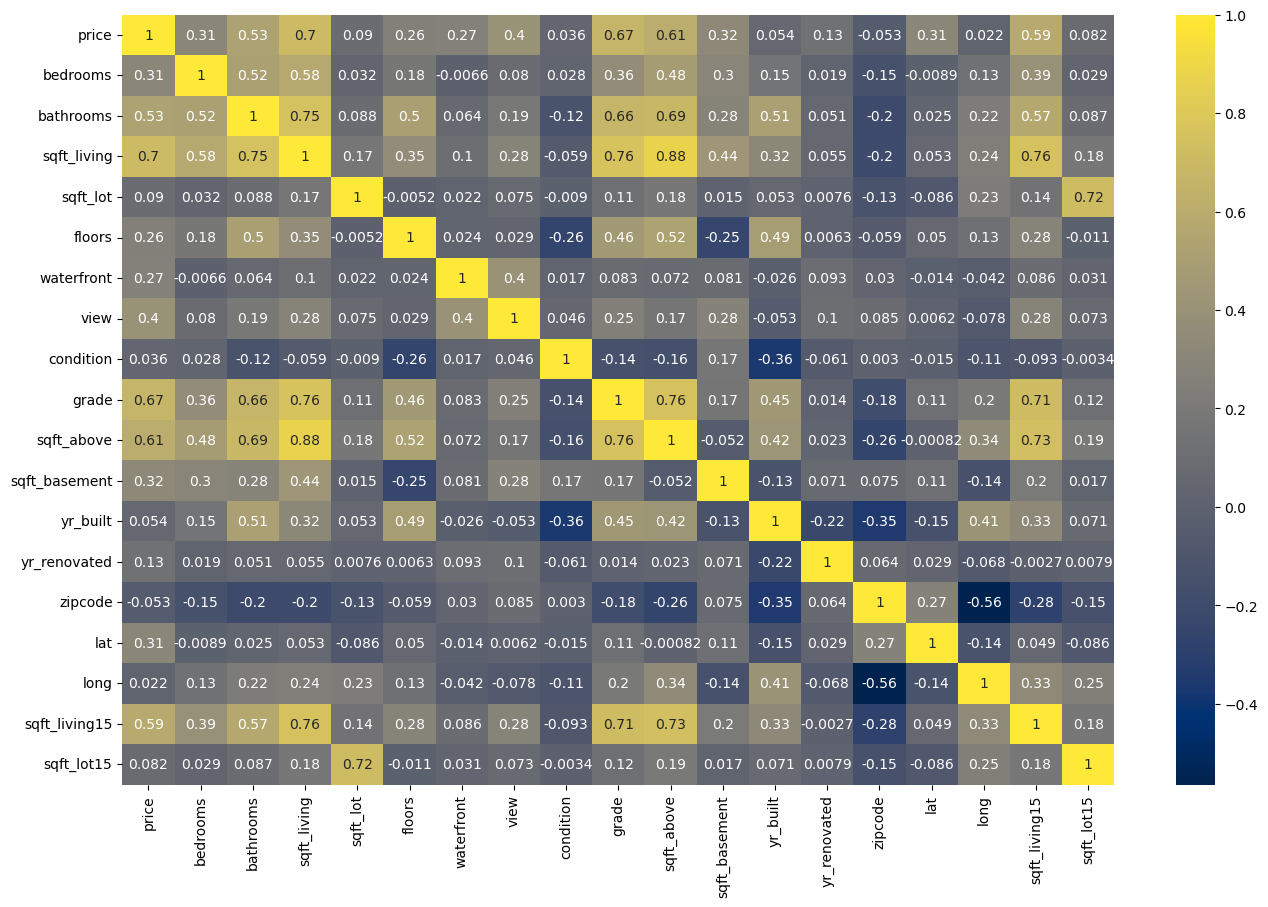

In [45]:
#on va faire la matrice de corrélation pour cross check nos observations avec les scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
corr = df.corr()
sns.heatmap(corr, cmap = 'cividis', annot = True)
plt.show()

les variables qui sont les plus corrélées au prix sont:
'bathrooms'
'sqft_living'
'grade'
'sqft_above'
'sqft_living15'

C'est en ligne avec ce qu'on avait trouvé, on va faire un scatter plot entre 'sqft_living15' et 'sqft_living' pour étudier la pertinence de garder les deux variables pour notre régression
-> leur corrélation est de 76%, il semblerait que l'on puisse garder les deux

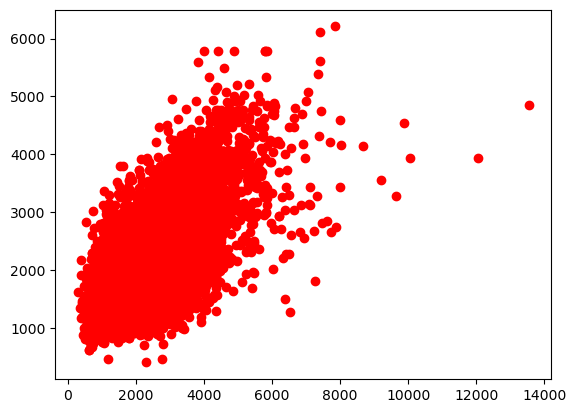

In [50]:
plt.plot(df['sqft_living'], df['sqft_living15'], 'ro')

### 3. Split your dataset into a training set and a testing set.

In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#extract x and y from our data
x=df["bathrooms"].values[:,np.newaxis]
# y est loutput
y=df["price"].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 91484608000.70923
R squared 0.28836846771827396
the coeff "a" of the regression is [250901.42342238]
the intercept "b" of the regression is 8832.548515027389


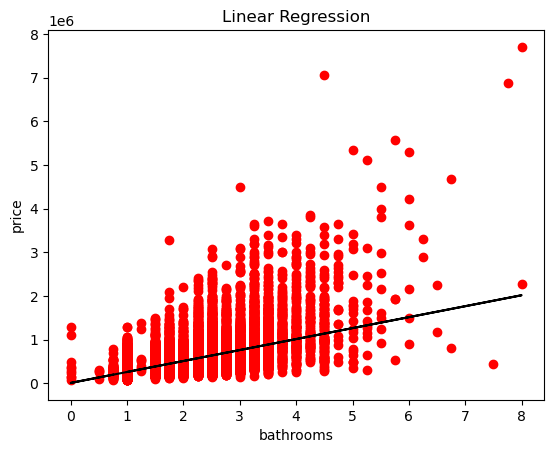

In [80]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("bathrooms")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [81]:
#extract x and y from our data
x=df["sqft_living"].values[:,np.newaxis]
# y est loutput
y=df["price"].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 63595386112.83997
R squared 0.5053104226540768
the coeff "a" of the regression is [281.90496509]
the intercept "b" of the regression is -46960.08336430264


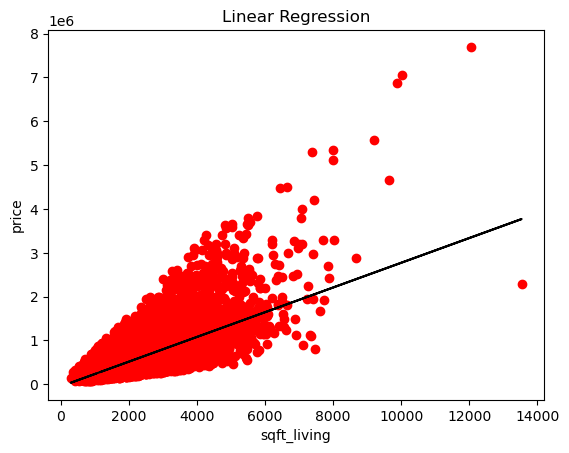

In [82]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [83]:
#extract x and y from our data
x=df["sqft_above"].values[:,np.newaxis]
# y est loutput
y=df["price"].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 80950749591.32977
R squared 0.3703082165408008
the coeff "a" of the regression is [270.8434787]
the intercept "b" of the regression is 55466.97857920994


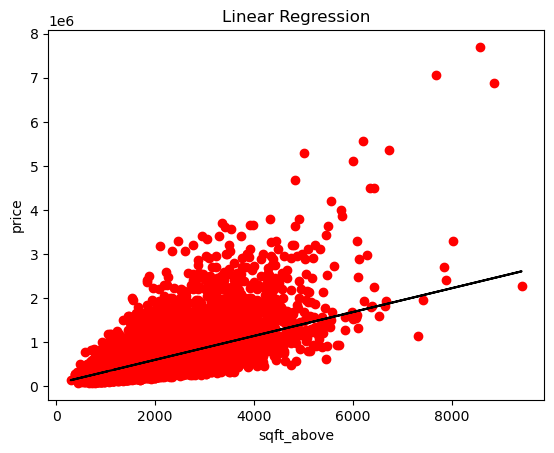

In [84]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_above")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [85]:
#extract x and y from our data
x=df["sqft_living15"].values[:,np.newaxis]
# y est loutput
y=df["price"].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 83245020275.337
R squared 0.35246176785386485
the coeff "a" of the regression is [315.29895054]
the intercept "b" of the regression is -87611.1929000445


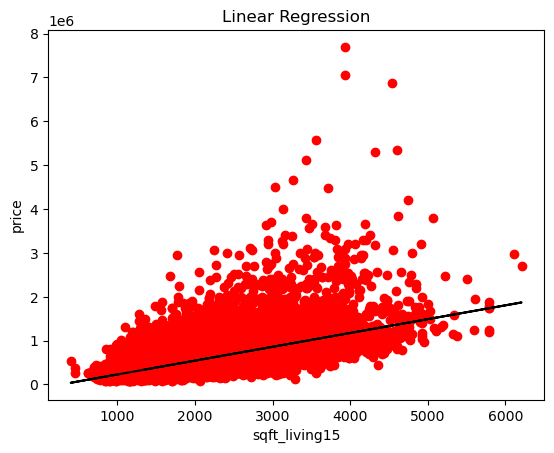

In [86]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living15")
plt.plot(x,model.predict(x),color="k")
plt.show()

### Multilinear Regression

In [87]:
#extract x and y from our data
x=df[["sqft_living","sqft_above","sqft_living15"]]
# y est loutput
y=df["price"].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression are {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 62791205793.78623
R squared 0.5115659019656851
the coeff "a" of the regression are [264.39145573 -33.81946651  79.29657422]
the intercept "b" of the regression is -107803.92710074561


Performance of the multilinear regression is slighlty higher than the mono one with squarefoot as the R squared is slightly higher and the MSE is slighlty lower

### 7. Apply polynomial regression and compare it to linear and multilinear regression.

In [99]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x=df["sqft_living"].values[:,np.newaxis]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
#on rajoute l'underscore pour la transformation polynomiale
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  58187155221.10236
R squared:  0.5473794408258633


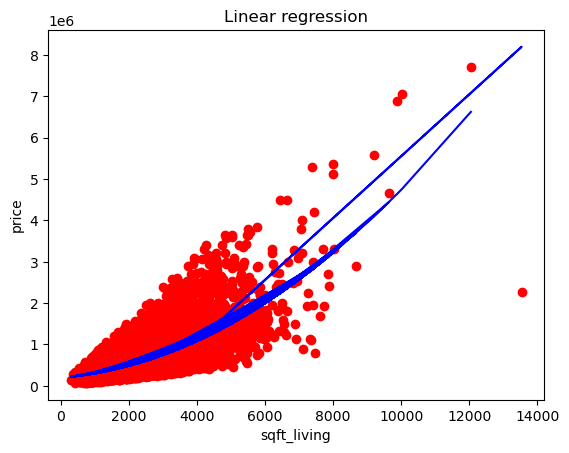

In [104]:
#plot the polynomial regression
df = df.sort_values(by=['price'])
x= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), "b-") 

In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x=df[["sqft_living","sqft_above","sqft_living15"]]
y= df["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
#on rajoute l'underscore pour la transformation polynomiale
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  57777075626.76467
R squared:  0.5505693279167468


On a essayé avec degré 2 et degré 3 et le R squared est optimisé avec une regression polynomiale de degré 2.